## Loading dataset for homework

In [119]:
import pandas as pd
import numpy as np

In [120]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [121]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [122]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [123]:
print(df.columns)


Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')


In [124]:
columnas = ['engine_displacement', 'horsepower', 'vehicle_weight',
       'model_year', 'fuel_efficiency_mpg']
columnas

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [125]:
df = df[columnas]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## Analyze y (efficiency)

In [126]:
df['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

In [127]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline #esto es para que los gráficos salgan en el notebook 


UsageError: unrecognized arguments: #esto es para que los gráficos salgan en el notebook


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

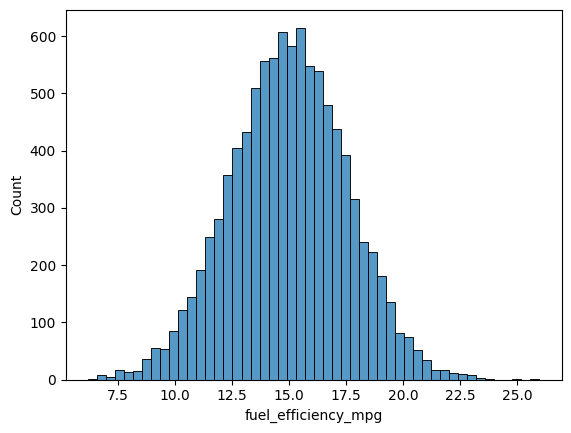

In [129]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [130]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [131]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Spliting my dataset in 3 (train, val & test) 60%, 20%, 20%

In [283]:
n = int(len(df)*1)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val
n, n_train, n_val, n_test

(9704, 5822, 1940, 1942)

In [284]:
idx = np.arange(n)

In [285]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [286]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [287]:
len(df_train), len(df_test), len(df_val)

(5822, 1942, 1940)

In [282]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [288]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [289]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Testing how to fill the nans in HP

In [290]:
X_train = df_train.values
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 260.        ,  139.        , 2606.9729844 , 2009.        ],
       [ 280.        ,  132.        , 4004.21432295, 2014.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ]],
      shape=(5822, 4))

In [291]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [292]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X, y_train

(array([[ 148,   24, 1385],
        [ 132,   25, 2031],
        [ 453,   11,   86],
        [ 158,   24,  185],
        [ 172,   25,  201],
        [ 413,   11,   86],
        [  38,   54,  185],
        [ 142,   25,  431],
        [ 453,   31,   86]]),
 array([16.64294342, 16.29837715, 18.59182197, ..., 16.96405425,
        10.05909406, 17.59323665], shape=(5822,)))

In [293]:
def train_linear_regression (X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    X_inv = np.linalg.inv(XTX)

    w_full= X_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

    pass

In [294]:
train_linear_regression (X,y)

(np.float64(30006.77669255562),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [295]:
w0,w =train_linear_regression(X_train, y_train)
w0,w

(np.float64(28.810749330744027),
 array([ 9.88022381e-05,  3.54195814e-03, -5.01316573e-03,  3.51135284e-04]))

In [296]:
y_pred = w0 + X_train.dot(w)
y_pred,y_test

(array([17.33513381, 16.29297399, 17.69877193, ..., 16.96501326,
         9.93934888, 17.54537364], shape=(5822,)),
 array([13.73334321, 15.81604972, 15.80435416, ..., 18.40443466,
        20.50246014, 16.81624056], shape=(1942,)))

<Axes: ylabel='Count'>

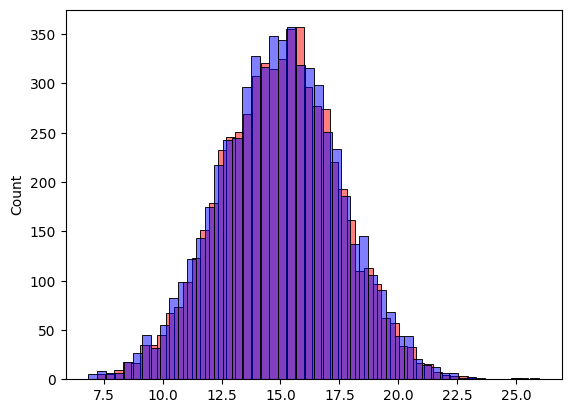

In [297]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [298]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [299]:
rmse(y_train, y_pred)

np.float64(0.5203457641474559)

In [300]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [303]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5171866956567477)

In [304]:
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5171866956567477)

In [ ]:
def prepare_X_mean(df):
    df_num = df   
    df_num = df_num.fillna(0)
    X = df_num.values
    return X